In [1]:
import matplotlib.pyplot as plt
import numpy as np, csv
from keras.models import load_model
from keras import backend as K

/home/aryan/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
WORDS_COUNT=133778
EPOCHS=3

model = load_model("{0} [{1}].hd5".format(WORDS_COUNT, EPOCHS))

In [3]:
def get_vectors(kfunc, getting):
    print("Getting {0} from file".format(getting))
    items = {}
    ids = []
    with open("{0}.{1}.csv".format(str(WORDS_COUNT), getting)) as fd:
        reader = csv.reader(fd)
        for i, w in reader:
            items[i] = w
            ids.append([i])
    ids = np.asarray(ids)
    print("Done!")
    print("Getting vectors")
    temp = kfunc([ids])[0]
    for i, v in zip(ids, temp):
        i, v = i[0], (v[0] if getting == 'words' else v)
        items[i] = (items[i], v)
    print("Done!")
    return items


def get_words_vectors():
    kfunc = K.function(
        [model.layers[1].input],
        [model.layers[3].get_output_at(0)]
    )

    return get_vectors(kfunc, 'words')

def get_rels_vectors():
    kfunc = K.function(
        [model.layers[0].input],
        [model.layers[4].output]
    )
    
    return get_vectors(kfunc, 'rels')

In [4]:
wdata = {}
ndata = {}
data = np.genfromtxt(str(WORDS_COUNT) + '.set', dtype=('<U2'))

for d in data:
    if d[1] not in wdata:
        wdata[d[1]] = []
    if d[1] not in ndata:
        ndata[d[1]] = []
    temp = wdata if d[3]=="1" else ndata
    temp[d[1]].append(tuple(d))


In [6]:
words_vectors = get_words_vectors()
rels_vectors = get_rels_vectors()

Getting words from file
Done!
Getting vectors
Done!
Getting rels from file
Done!
Getting vectors
Done!


In [77]:
SAMPLES_COUNT = 5

def get_samples(data_rel):
    samples = {}
    for r in data_rel:
        temp = np.random.choice(len(data_rel[r]), SAMPLES_COUNT)
        samples[r] = [data_rel[r][i] for i in temp]
    return samples

wsamples = get_samples(wdata)
nsamples = get_samples(ndata)

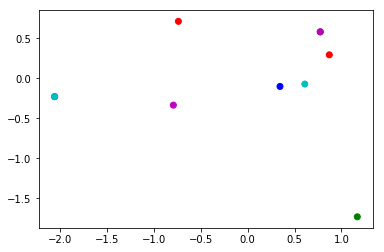

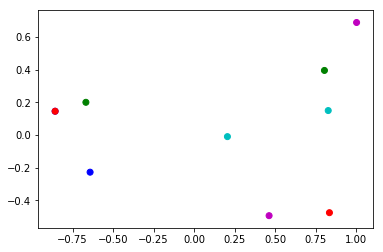

In [79]:
from sklearn.manifold import TSNE, Isomap


REL = "0"
csamples_w = np.asarray(wsamples[REL])
csamples_n = np.asarray(nsamples[REL])

temp_w = [s for s in csamples_w[:,0]] + [s for s in csamples_w[:,2]]
temp_n = [s for s in csamples_n[:,0]] + [s for s in csamples_n[:,2]]
words = np.asarray(temp_w+temp_n)
vectors = [words_vectors[w][1] for w in words]
V = Isomap().fit_transform(vectors)
X,Y = V[:,0], V[:,1]
labels = [words_vectors[w][0] for w in words]
colors = ['b','b','g','g','r','r','c','c','m','m']
plt.scatter(X[:10], Y[:10], c=colors)
plt.show()
plt.scatter(X[10:], Y[10:], c=colors)
plt.show()